# Vektorová reprezentácia slov

## Problém s reprezentovaním slov

- Neurónová sieť nedokáže pracovať s textovou reprezentáciou slova
- Ako efektívne reprezentovať slová číselne?
- V minulosti zaužívaný one hot encoding, resp. po česky kód 1 z n
- Príklad v obrázku nižšie
- Neefektívne
- Nezaznamenávalo žiadno sémantiku. koruna (na hlave) = koruna (platidlo)

<img src="https://miro.medium.com/max/674/1*9ZuDXoc2ek-GfHE2esty5A.png" alt="one hot encoding" width="500" height="300">  




<img src="https://www.czechcrunch.cz/wp-content/uploads/2020/05/tomas-mikolov.jpg" alt="mikolov" width="500" height="300">  

- Máme veľa, veľa núl vo vektoroch. Čo s nimi? Nedá sa namiesto nich uložiť niečo rozumnejšie?
- V minulosti existovali snahy, ale problémom bola výpočetná náročnosť - veľkosť jazyka
- Mikolov a tím prišli s inováciami, ktoré umožňovali efektívne vytvoriť vektory zo slov (miliardy slov) - word2vec
- Neurónová sieť - dva prístupy
    - skip gram model
    - CBOW
- Nie je zaujímavé v konečnom dôsledku to, čo prezentuje neurónová sieť, ale váhy


---
- Tím na Stanforde vytvoril ďalší prístup zvaný GloVe
- Potencionálny problém s word2vec - veľkosť kontextu
- Práca s maticami
- Neveľké rozdieli vo výsledku oproti word2vec. Niekedy funguje jeden prístup o čosi lepšie ako druhý a inokedy je to naopak

---
- Z matíc, ktorých rozmery boli v miliardách či biliónoch sa dostávame ku vektorovm, ktoré majú dimenziu maximálne 300 - 500
- "Zázračný prášok", ktorý všetky doterajšie úkony v NLP významene vylepšil







In [ ]:
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Dáta - <a href="https://nlp.stanford.edu/data/glove.6B.zip">GloVe</a>

In [ ]:
PATH_GLOVE_VECTORS = "/content/gdrive/MyDrive/glove.6B.100d.txt" 

In [ ]:
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(PATH_GLOVE_VECTORS, word2vec_glove_file)

(400000, 100)

In [ ]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [ ]:
model.most_similar('czech')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('slovak', 0.7967678308486938),
 ('slovakia', 0.774276614189148),
 ('republic', 0.7506161332130432),
 ('hungary', 0.7310476303100586),
 ('poland', 0.715416669845581),
 ('lithuania', 0.7013394832611084),
 ('romania', 0.6967440843582153),
 ('hungarian', 0.6798535585403442),
 ('polish', 0.6699516773223877),
 ('prague', 0.6653043627738953)]

- príjemné zistenie, že s vektormi sa dajú vykonávať rôzne klasické vektorové operácie a výsledkom bude vektor, ktorý má sémantický zmysel

<img src="http://www.mlguru.com/wp-content/uploads/2015/03/w2v.png" alt="queen king priklad" width="500" height="300">

In [ ]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [ ]:
analogy('prague', 'czech', 'bratislava')

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


'slovak'

In [ ]:
print(model.doesnt_match("prague brno budapest bratislava".split()))

brno


/usr/local/lib/python3.6/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)
/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])

    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

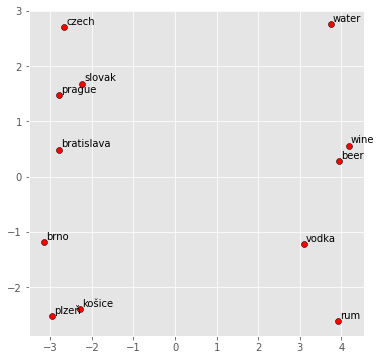

In [ ]:
display_pca_scatterplot(model, 
                        ["czech", "slovak", "prague", "brno", "plzeň", "bratislava", "košice",
                         "wine", "beer", "vodka", "rum", "water"])

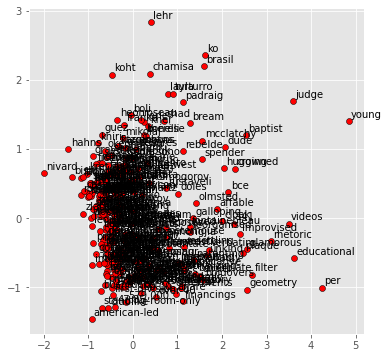

In [ ]:
display_pca_scatterplot(model, sample=300)